In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import os
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [4]:
! kaggle datasets download arjuntejaswi/plant-village

100% 327M/329M [00:18<00:00, 22.3MB/s]
100% 329M/329M [00:18<00:00, 18.9MB/s]


In [5]:
! unzip /content/plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [6]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [7]:
# defining the varibles
IMAGE_SIZE = 256
BATCH_SIZE  = 32
CHANNELS = 3
EPOCHS = 50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage" ,
    shuffle = True ,
    image_size = (IMAGE_SIZE , IMAGE_SIZE) ,
    batch_size = BATCH_SIZE ,

)

Found 20638 files belonging to 15 classes.


In [9]:
dataset.class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [10]:
len(dataset)

645

In [11]:
for img_batch , label_batch in dataset.take(1):
  print(img_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[11 11 14  0 14  8  1  8  9  5  0  1  9 11  0 11 14  5 10  9  0 12 14  9
 10 12 13 14  9  0  4  3]


In [36]:
class_names = dataset.class_names
len(class_names)

15

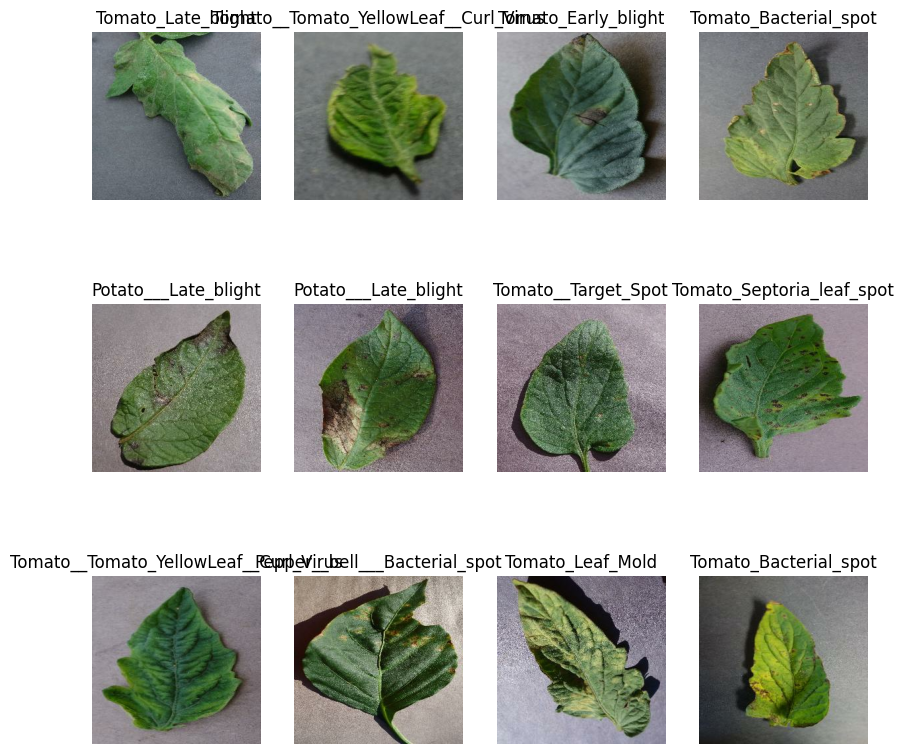

In [14]:
class_names = dataset.class_names
plt.figure(figsize = (10, 10))

for img_batch , label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3 , 4 , i+1)
    plt.title(class_names[label_batch[i].numpy()])
    plt.imshow(img_batch[i].numpy().astype('uint'))
    plt.axis('off')





In [15]:
!pip install split-folders
!splitfolders --ratio 0.8 0.1 0.1 -- ./PlantVillage/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Copying files: 20639 files [00:05, 3496.49 files/s]


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tr_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    rotation_range = 10 ,
    horizontal_flip = True ,
)

In [18]:
tr_generator = tr_datagen.flow_from_directory(
    "output/train" ,
    batch_size = BATCH_SIZE ,
    target_size = (IMAGE_SIZE , IMAGE_SIZE) ,

    class_mode = "sparse"
)

Found 16504 images belonging to 15 classes.


In [34]:
classes = list[tr_generator.class_indices.keys]
print(classes)



list[<built-in method keys of dict object at 0x7f3ab07dc900>]


In [22]:
# for validatio dataset
val_data = ImageDataGenerator(
    rescale = 1. / 255 ,
    horizontal_flip = True ,
    rotation_range = 10


)

val_gen = val_data.flow_from_directory(
    "output/val"  ,
    batch_size = BATCH_SIZE ,
    target_size  = (IMAGE_SIZE , IMAGE_SIZE) ,
    class_mode = "sparse"
)

Found 2058 images belonging to 15 classes.


In [24]:
test_data = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_gen = test_data.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2076 images belonging to 15 classes.


In [38]:
no_classes  = len(class_names)
image_input = (IMAGE_SIZE , IMAGE_SIZE , CHANNELS )

model = models.Sequential ([
    layers.InputLayer (input_shape = image_input ) ,
    layers.Conv2D (32 , kernel_size = (3,3) , activation = "relu") ,
    layers.MaxPooling2D((2,2)),

    layers.Conv2D( 64 , (3,3) , activation ="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D( 64 , (3,3) , activation ="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D( 64 , (3,3) , activation ="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D( 64 , (3,3) , activation ="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D( 64 , (3,3) , activation ="relu"),
    layers.MaxPooling2D((2,2)) ,


    layers.Flatten() ,

    layers.Dense(64 , activation = "relu"),
    layers.Dense(no_classes , activation = "softmax" )



])

model.build(input_shape = image_input )

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)      

In [41]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False) ,
    metrics = ['accuracy']

)

In [43]:
history = model.fit(
    tr_generator  ,
    steps_per_epoch = 47 ,
    batch_size = BATCH_SIZE ,

    validation_data = val_gen ,
    validation_steps = 7 ,

    epochs = 30,
    verbose = 1
)

Epoch 1/30
47/47 [==============================] - 30s 614ms/step - loss: 2.6130 - accuracy: 0.1297 - val_loss: 2.4816 - val_accuracy: 0.1562
Epoch 2/30
47/47 [==============================] - 30s 631ms/step - loss: 2.4265 - accuracy: 0.1968 - val_loss: 2.3115 - val_accuracy: 0.2411
Epoch 3/30
47/47 [==============================] - 28s 597ms/step - loss: 2.2549 - accuracy: 0.2600 - val_loss: 2.3230 - val_accuracy: 0.2366
Epoch 4/30
47/47 [==============================] - 28s 597ms/step - loss: 2.0106 - accuracy: 0.3424 - val_loss: 1.8176 - val_accuracy: 0.3795
Epoch 5/30
47/47 [==============================] - 40s 855ms/step - loss: 1.8662 - accuracy: 0.3730 - val_loss: 1.7102 - val_accuracy: 0.4688
Epoch 6/30
47/47 [==============================] - 30s 634ms/step - loss: 1.7372 - accuracy: 0.4275 - val_loss: 1.6153 - val_accuracy: 0.4330
Epoch 7/30
47/47 [==============================] - 30s 631ms/step - loss: 1.5685 - accuracy: 0.4814 - val_loss: 1.7550 - val_accuracy: 0.4420

In [48]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 47}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

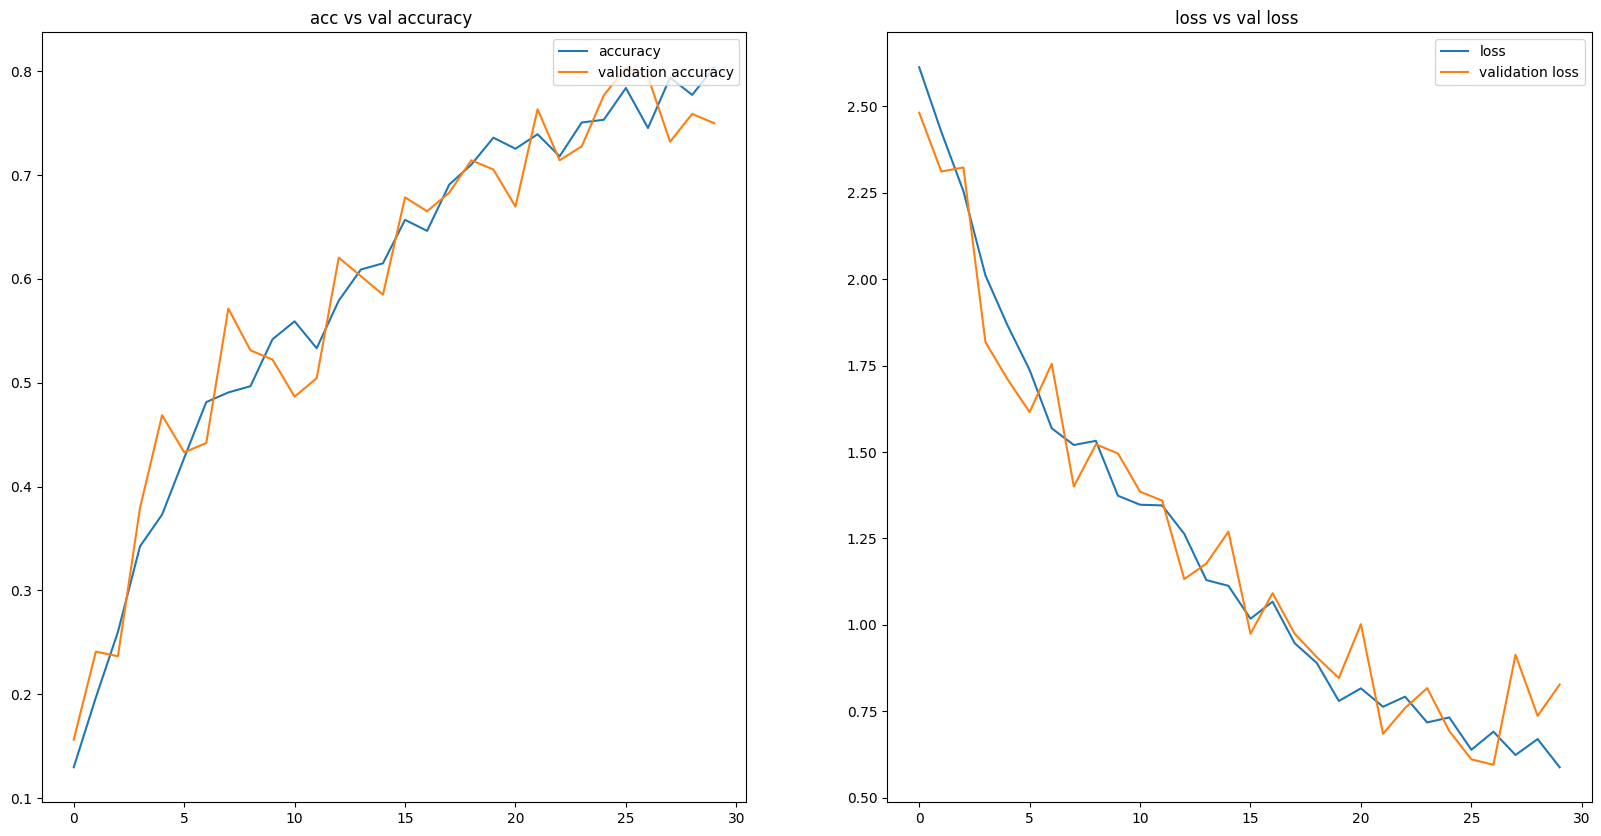

In [51]:
fig = plt.figure(figsize = ( 20 , 10 ))

# first cavas

plt.subplot( 1, 2, 1 )
plt.plot(range(30) , acc , label = "accuracy")
plt.plot(range(30) , val_acc , label = "validation accuracy")
plt.title("acc vs val accuracy ")
plt.legend(loc = "upper right")


# second canvas

plt.subplot( 1, 2, 2 )
plt.plot(range(30) , loss , label = "loss")
plt.plot(range(30) , val_loss , label = "validation loss")
plt.title("loss vs val loss ")
plt.legend(loc = "upper right")

plt.show()


first image
label is Tomato_Spider_mites_Two_spotted_spider_mite
1/1 [==============================] - 0s 33ms/step
Label predict for first img  Tomato_Spider_mites_Two_spotted_spider_mite


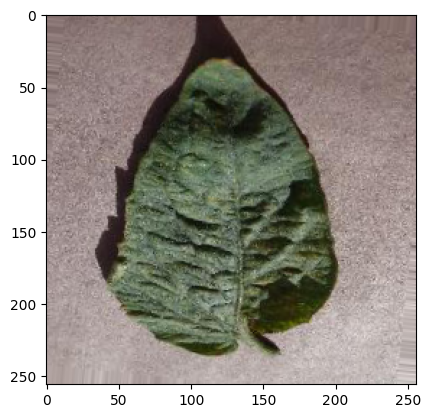

In [54]:
import numpy as np

for img_batch , img_label in test_gen:

  f_image = img_batch[0]
  f_label = int (img_label[0])

  print("first image")
  plt.imshow(f_image)
  print(f'label is {class_names[f_label]}')

  # testing on the test batch

  batch_predictions = model.predict(img_batch)

  print("Label predict for first img ", class_names[np.argmax(batch_predictions[0])])

  break


In [61]:
def prediction (model , image):
  # step 1 - convert kro req size me
  img_array = tf.keras.preprocessing.image.img_to_array(image)
  img_array = tf.expand_dims(img_array  , 0 )

  prediction = model.predict (img_array )
  predicted_class = class_names [np.argmax(prediction[0])]

  confidence = round(100 * (np.max(prediction[0])), 2)
  return predicted_class , confidence

1/1 [==============================] - 0s 22ms/step


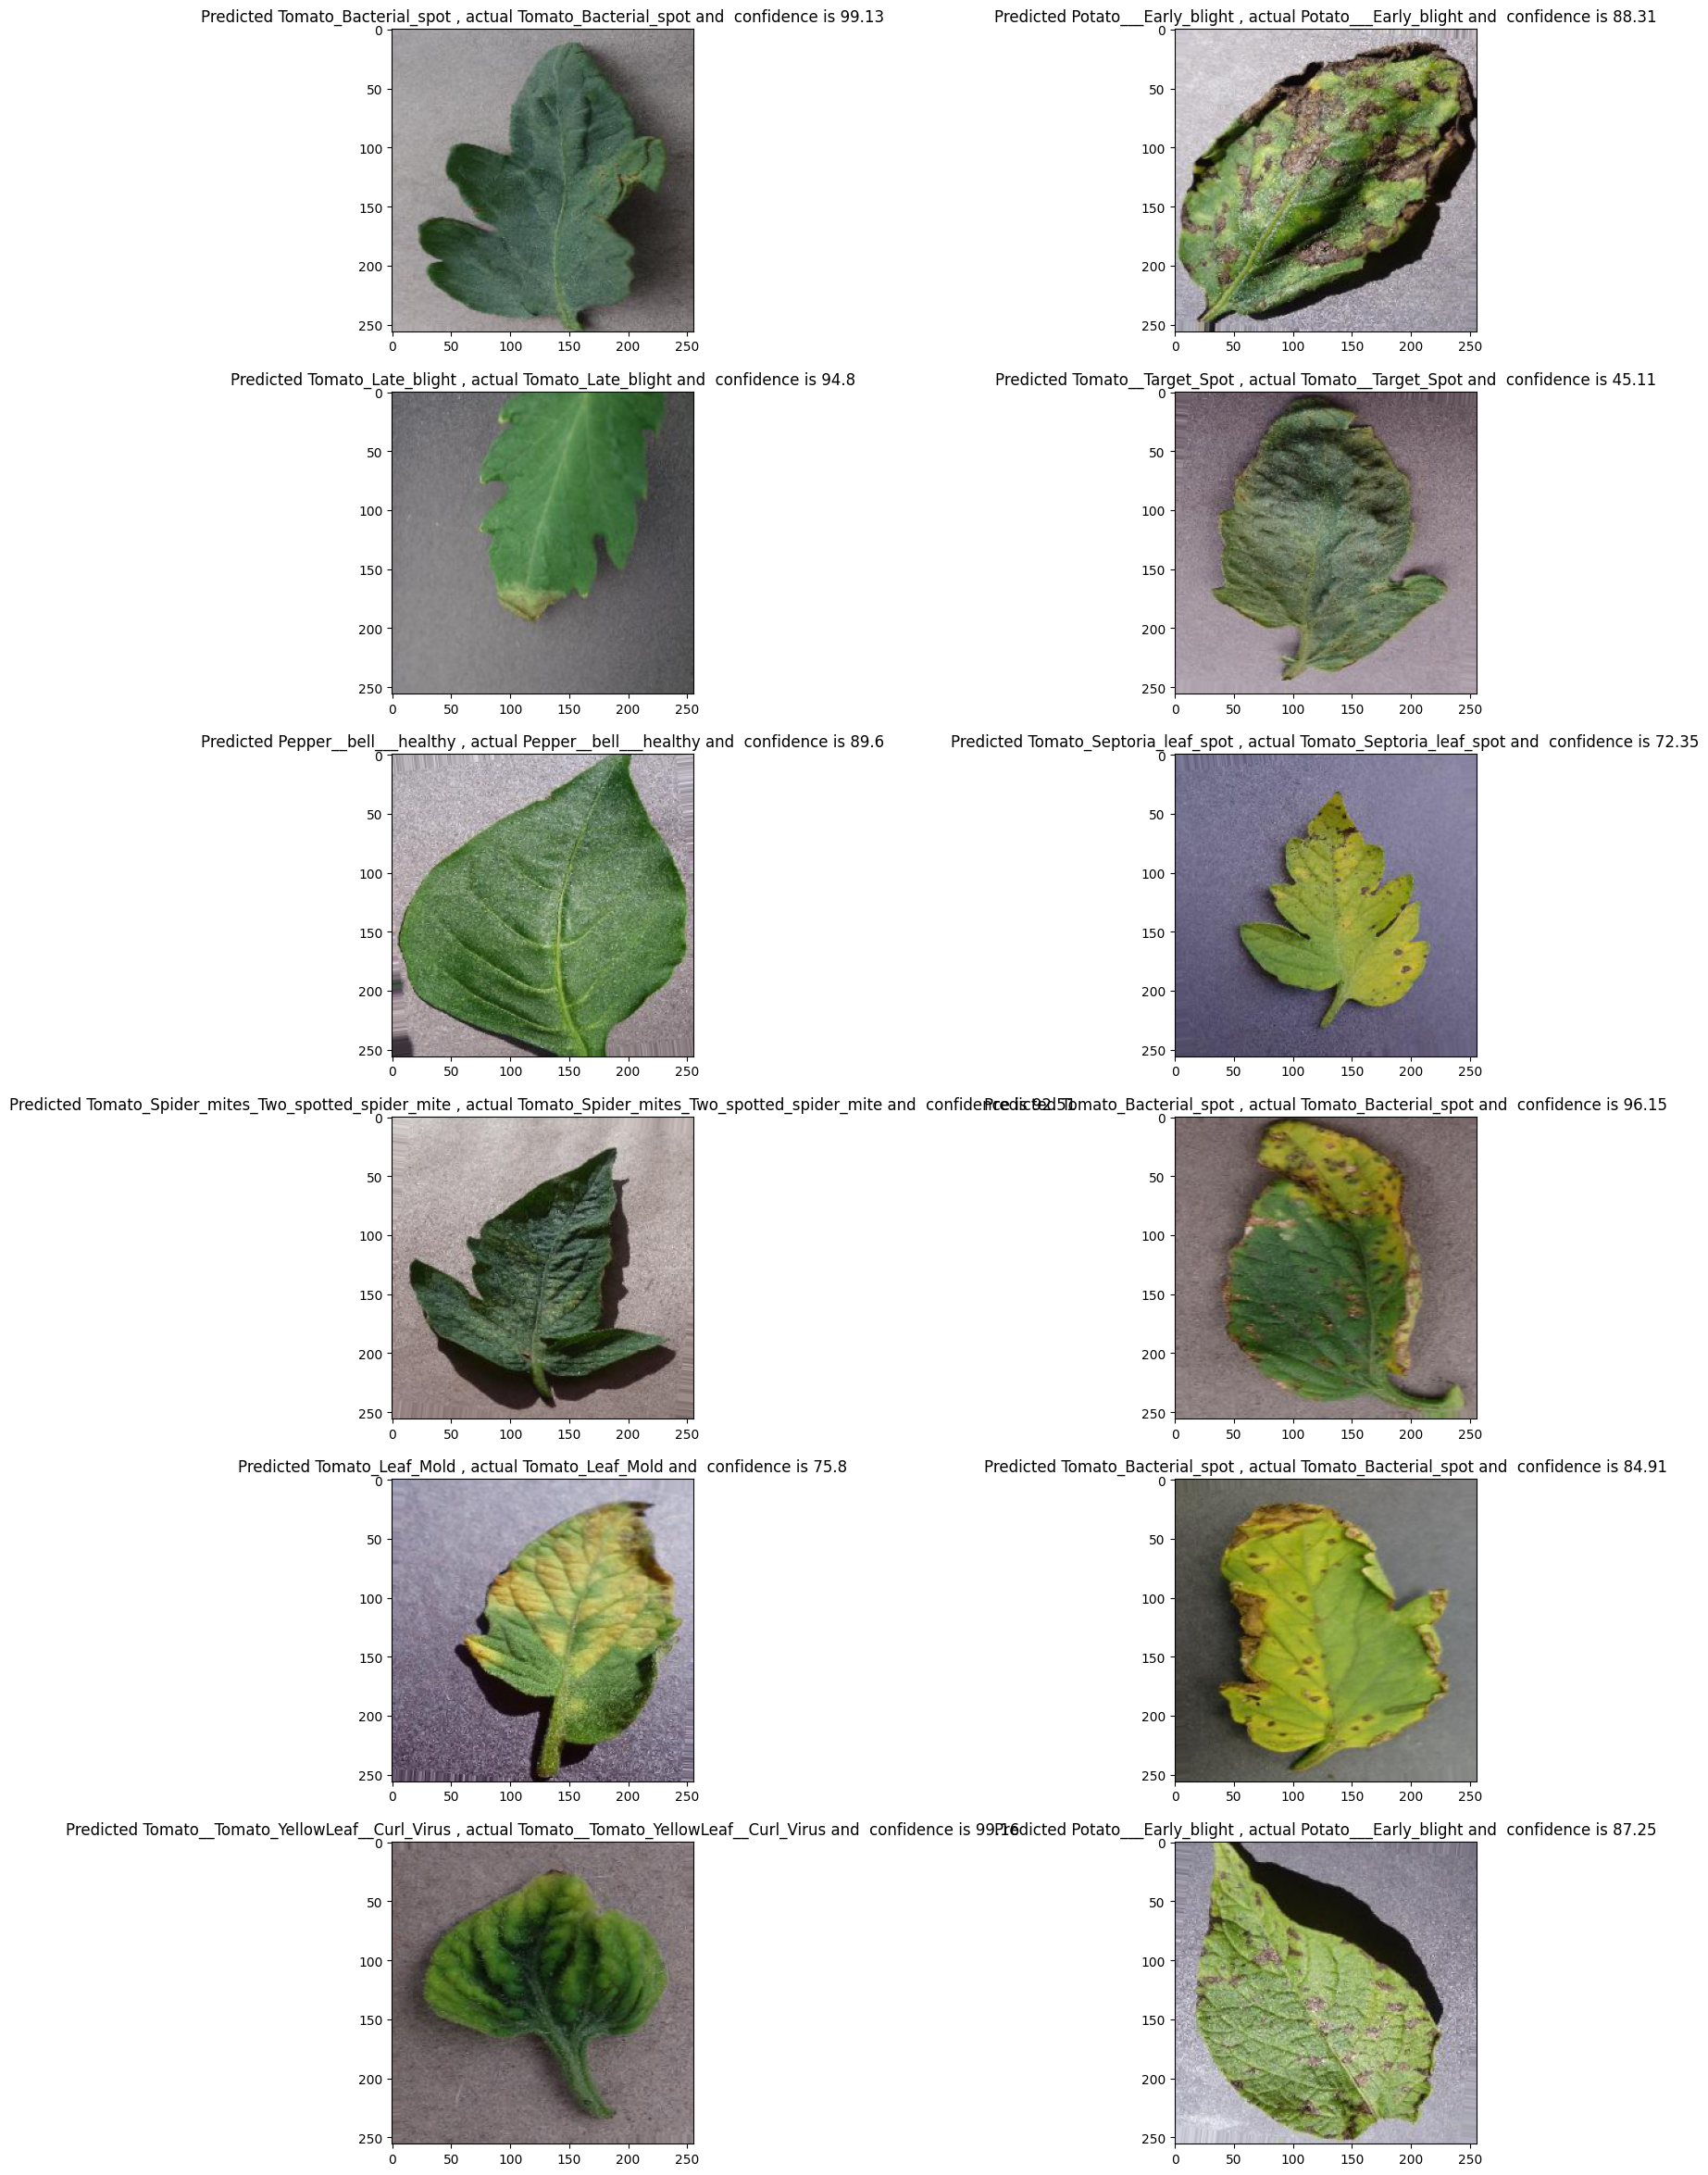

In [68]:
plt.figure ( figsize = (20 , 50 ))
for imgs , labels in test_gen:

  for i in range(12):
    ax = plt.subplot(10 , 2 , i+1)

    plt.imshow(imgs[i])

    pre_class , conf = prediction(model , imgs[i])
    actual =  class_names [int(labels[i])]

    plt.title(f'Predicted {pre_class} , actual {actual} and  confidence is {conf}')


  break

In [69]:
model.save("tom-pot.h5")